In [1]:
import random 
import numpy as np
import matplotlib.pyplot as plt

## Q3 f(x) = sum(x)

In [2]:
# parameters
pop_size = 200
indv_length = 50
max_gen = 100
runs = 10

In [3]:
def RandIndv():
    indv=[]
    for _ in range(indv_length):
        gene = random.randint(0,1)
        indv.append(gene)
    return indv

In [4]:
def InitPop():
    pop = []
    for _ in range(pop_size):
        indv = RandIndv()
        pop.append(indv)
    return pop

In [5]:
def Fitness(indv):
    return sum(indv)

In [6]:
def Select(pop, fits):
    total_fit = sum(fits)
    pivot = random.uniform(0,total_fit)
    tmp=0
    for idx, fit in enumerate(fits):
        tmp += fit
        if tmp>pivot:
            return pop[idx]

In [7]:
def CrossOver(p1,p2):
    point = random.randint(1,indv_length-1)
    c1 = p1[:point]+p2[point:]
    c2 = p2[:point]+p1[point:]
    return c1, c2

In [8]:
avg_best_fits=np.zeros(max_gen)
for run in range(runs):
    pop = InitPop()
    best_fits = []

    for gen in range(max_gen):
        fits = []
        for indv in pop:
            fit = Fitness(indv)
            fits.append(fit)
        best_fit = max(fits)
        best_fits.append(best_fit)

        next_pop=[]

        for _ in range(pop_size//2):
            p1 = Select(pop, fits)
            p2 = Select(pop, fits)

            c1,c2 = CrossOver(p1,p2)
            next_pop.append(c1)
            next_pop.append(c2)
        pop = next_pop

    avg_best_fits += np.array(best_fits)

avg_best_fits/=runs
    
    

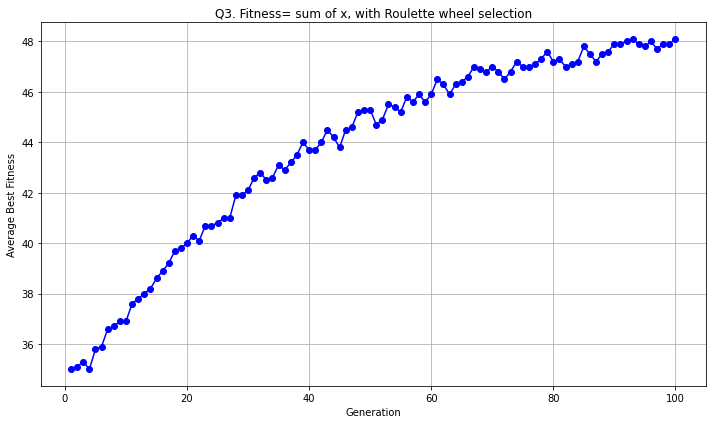

In [9]:
gen = range(1, max_gen + 1)
plt.figure(figsize=(10, 6))
plt.plot(gen, avg_best_fits, marker='o', linestyle='-', color='b')
plt.title('Q3. Fitness= sum of x, with Roulette wheel selection')
plt.xlabel('Generation')
plt.ylabel('Average Best Fitness')
plt.grid(True)
plt.tight_layout()
plt.show()

## Q4. f(x) = 1000+sum(x)

In [10]:
def NewFitness(indv):
    return sum(indv)+1000

In [25]:
avg_best_fits=np.zeros(max_gen)
for run in range(runs):
    pop = InitPop()
    best_fits = []

    for gen in range(max_gen):
        fits = []
        for indv in pop:
            fit = NewFitness(indv)
            fits.append(fit)
        best_fit = max(fits)-1000
        best_fits.append(best_fit)

        next_pop=[]

        for _ in range(pop_size//2):
            p1 = Select(pop, fits)
            p2 = Select(pop, fits)

            c1,c2 = CrossOver(p1,p2)
            next_pop.append(c1)
            next_pop.append(c2)
        pop = next_pop

    avg_best_fits += np.array(best_fits)

avg_best_fits/=runs

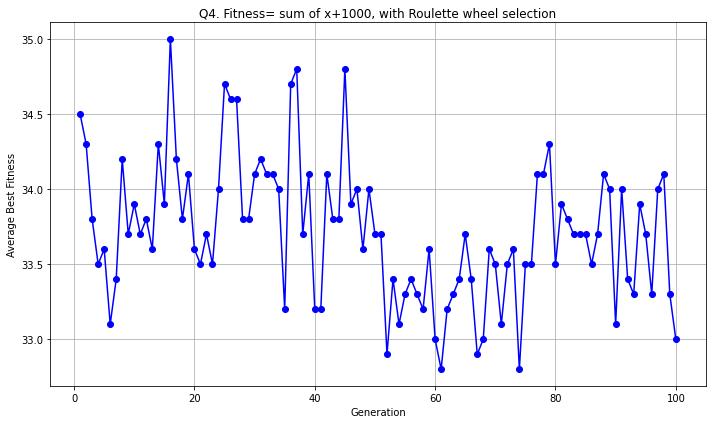

In [26]:
gen = range(1, max_gen + 1)
plt.figure(figsize=(10, 6))
plt.plot(gen, avg_best_fits, marker='o', linestyle='-', color='b')
plt.title('Q4. Fitness= sum of x+1000, with Roulette wheel selection')
plt.xlabel('Generation')
plt.ylabel('Average Best Fitness')
plt.grid(True)
plt.tight_layout()
plt.show()

## Q5 tourment and sum(x)

In [13]:
tour_size = 2

In [14]:
def TourSelection(pop, fits):
    tour_idx = []
    for _ in range(tour_size):
        idx = random.randint(0,pop_size-1)
        tour_idx.append(idx)
    tour_fit = []
    for idx in tour_idx:
        tour_fit.append(fits[idx])
    max_fit = max(tour_fit)
    max_idx = tour_fit.index(max_fit)
    winner = tour_idx[max_idx]
    
    return pop[winner]

In [15]:
avg_best_fits=np.zeros(max_gen)
for run in range(runs):
    pop = InitPop()
    best_fits = []

    for gen in range(max_gen):
        fits = []
        for indv in pop:
            fit = Fitness(indv)
            fits.append(fit)
        best_fit = max(fits)
        best_fits.append(best_fit)

        next_pop=[]

        for _ in range(pop_size//2):
            p1 = TourSelection(pop, fits)
            p2 = TourSelection(pop, fits)

            c1,c2 = CrossOver(p1,p2)
            next_pop.append(c1)
            next_pop.append(c2)
        pop = next_pop

    avg_best_fits += np.array(best_fits)

avg_best_fits/=runs
    
    

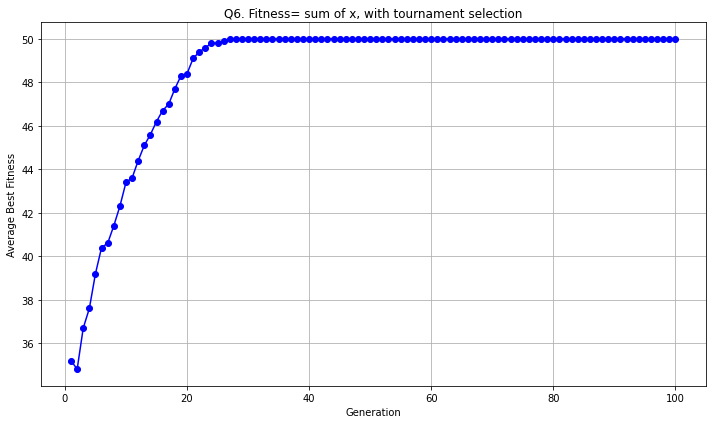

In [16]:
gen = range(1, max_gen + 1)
plt.figure(figsize=(10, 6))
plt.plot(gen, avg_best_fits, marker='o', linestyle='-', color='b')
plt.title('Q6. Fitness= sum of x, with tournament selection')
plt.xlabel('Generation')
plt.ylabel('Average Best Fitness')
plt.grid(True)
plt.tight_layout()
plt.show()

## Q7. f(x) = sum(x) + 1000, tournament selection

In [17]:
avg_best_fits=np.zeros(max_gen)
for run in range(runs):
    pop = InitPop()
    best_fits = []

    for gen in range(max_gen):
        fits = []
        for indv in pop:
            fit = NewFitness(indv)
            fits.append(fit)
        best_fit = max(fits)-1000
        best_fits.append(best_fit)

        next_pop=[]

        for _ in range(pop_size//2):
            p1 = TourSelection(pop, fits)
            p2 = TourSelection(pop, fits)

            c1,c2 = CrossOver(p1,p2)
            next_pop.append(c1)
            next_pop.append(c2)
        pop = next_pop

    avg_best_fits += np.array(best_fits)

avg_best_fits/=runs
    
    

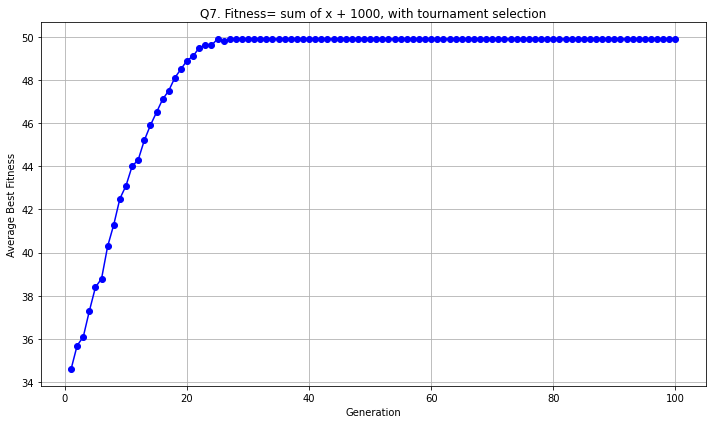

In [18]:
gen = range(1, max_gen + 1)
plt.figure(figsize=(10, 6))
plt.plot(gen, avg_best_fits, marker='o', linestyle='-', color='b')
plt.title('Q7. Fitness= sum of x + 1000, with tournament selection')
plt.xlabel('Generation')
plt.ylabel('Average Best Fitness')
plt.grid(True)
plt.tight_layout()
plt.show()